In [1]:
from google.colab import drive
drive.mount('\content\drive')

KeyboardInterrupt: ignored

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dataset = "/content/contentdrive/MyDrive/dataset_MinorProject/train"
test_dataset = "/content/contentdrive/MyDrive/dataset_MinorProject/test"

In [4]:
import pathlib
train_dataset = pathlib.Path(train_dataset)
train_dataset

PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train')

In [5]:
import pathlib
test_dataset = pathlib.Path(test_dataset)
test_dataset

PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/test')

In [6]:
list(train_dataset.glob('*/*.jpg'))[:5]

[PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_230 (2).jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_245 (2).jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_214.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_229.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_244 (2).jpg')]

In [7]:
list(test_dataset.glob('*/*.jpg'))[:5]

[PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/test/sparse_traffic/images_029.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/test/sparse_traffic/images_100.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/test/sparse_traffic/images_036.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/test/sparse_traffic/images_016.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/test/sparse_traffic/images_071.jpg')]

In [8]:
image_count = len(list(train_dataset.glob('*/*.jpg')))
print(image_count)

3600


In [9]:
image_count = len(list(test_dataset.glob('*/*.jpg')))
print(image_count)

802


In [10]:
#We have 3600 training set images

sparse_traffic = list(train_dataset.glob('sparse_traffic/*'))
#to get all paths of images of that category
sparse_traffic[:5]

[PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_230 (2).jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_245 (2).jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_214.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_229.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/images_244 (2).jpg')]

Data Visualisation


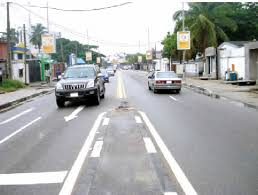

In [11]:
PIL.Image.open(str(sparse_traffic[0]))

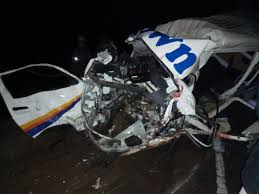

In [12]:
accident = list(train_dataset.glob('accident/*'))
PIL.Image.open(str(accident[0]))

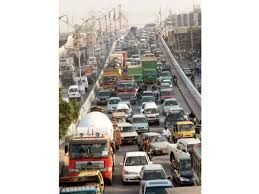

In [13]:
dense_traffic = list(train_dataset.glob('dense_traffic/*'))
PIL.Image.open(str(dense_traffic[0]))

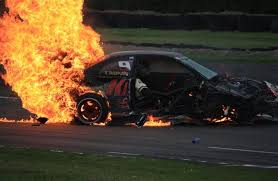

In [14]:
fire = list(train_dataset.glob('fire/*'))
PIL.Image.open(str(fire[0]))

Reading images into numpy array using opencv

In [15]:
road_images_dict = {
    'accident': list(train_dataset.glob('accident/*')),
    'fire': list(train_dataset.glob('fire/*')),
    'dense_traffic': list(train_dataset.glob('dense_traffic/*')),
    'sparse_traffic': list(train_dataset.glob('sparse_traffic/*')),
}

In [16]:
road_labels_dict = {
    'accident': 0,
    'fire': 1,
    'dense_traffic': 2,
    'sparse_traffic': 3,
}

In [17]:
road_images_dict['accident'][:5]

[PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/accident/images_212 (2).jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/accident/images_219 (2).jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/accident/images_220.jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/accident/images_214 (2).jpg'),
 PosixPath('/content/contentdrive/MyDrive/dataset_MinorProject/train/accident/images_217.jpg')]

In [18]:
str(road_images_dict['accident'][0])

'/content/contentdrive/MyDrive/dataset_MinorProject/train/accident/images_212 (2).jpg'

In [19]:
img = cv2.imread(str(road_images_dict['accident'][0]))

In [20]:
img

array([[[ 5,  3,  3],
        [ 5,  3,  3],
        [ 5,  3,  3],
        ...,
        [10,  5,  4],
        [10,  5,  4],
        [10,  5,  4]],

       [[ 5,  3,  3],
        [ 5,  3,  3],
        [ 5,  3,  3],
        ...,
        [10,  5,  4],
        [10,  5,  4],
        [10,  5,  4]],

       [[ 5,  3,  3],
        [ 5,  3,  3],
        [ 5,  3,  3],
        ...,
        [10,  5,  4],
        [10,  5,  4],
        [10,  5,  4]],

       ...,

       [[18, 21, 25],
        [18, 21, 25],
        [18, 21, 25],
        ...,
        [46, 42, 31],
        [44, 42, 31],
        [46, 42, 31]],

       [[15, 18, 16],
        [19, 21, 21],
        [23, 25, 25],
        ...,
        [46, 42, 31],
        [46, 41, 32],
        [48, 41, 32]],

       [[15, 19, 14],
        [19, 23, 18],
        [23, 25, 25],
        ...,
        [48, 41, 32],
        [48, 41, 32],
        [47, 40, 31]]], dtype=uint8)

In [21]:
#imread converted image to a 3 dimensional array
img.shape

(194, 259, 3)

Resize Image


In [22]:
X, y = [], []

for category_name, images in road_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))

        # Check if the image is empty
        if img is not None:
            resized_img = cv2.resize(img, (180, 180))
            X.append(resized_img)
            y.append(road_labels_dict[category_name])
        else:
            # Ignore the image if it is empty
            print("Ignoring empty image:", image)

Ignoring empty image: /content/contentdrive/MyDrive/dataset_MinorProject/train/sparse_traffic/Thumbs.db


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(180, 180),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
#here X represent the images in train dataset and y their corresponding labels
X[0]

array([[[ 5,  3,  3],
        [ 5,  3,  3],
        [ 5,  3,  3],
        ...,
        [ 9,  4,  3],
        [10,  5,  4],
        [10,  5,  4]],

       [[ 5,  3,  3],
        [ 5,  3,  3],
        [ 5,  3,  3],
        ...,
        [ 9,  4,  3],
        [10,  5,  4],
        [10,  5,  4]],

       [[ 5,  3,  3],
        [ 5,  3,  3],
        [ 5,  3,  3],
        ...,
        [ 9,  4,  3],
        [10,  5,  4],
        [10,  5,  4]],

       ...,

       [[18, 21, 25],
        [18, 21, 25],
        [18, 21, 25],
        ...,
        [39, 35, 24],
        [45, 42, 31],
        [45, 42, 31]],

       [[16, 19, 18],
        [21, 23, 24],
        [21, 23, 25],
        ...,
        [42, 38, 27],
        [46, 42, 31],
        [47, 41, 32]],

       [[16, 20, 15],
        [22, 24, 22],
        [21, 23, 24],
        ...,
        [41, 40, 26],
        [48, 41, 32],
        [47, 40, 31]]], dtype=uint8)

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [23]:
X_train = np.array(X)
y_train = np.array(y)

In [24]:
#Resizing the test dataset

road_images_dict_test = {
    'accident': list(test_dataset.glob('accident/*')),
    'fire': list(test_dataset.glob('fire/*')),
    'dense_traffic': list(test_dataset.glob('dense_traffic/*')),
    'sparse_traffic': list(test_dataset.glob('sparse_traffic/*')),
}


In [25]:
X_test, y_test = [], []

for category_name, images in road_images_dict_test.items():
    for image in images:
        img = cv2.imread(str(image))

        # Check if the image is empty
        if img is not None:
            resized_img = cv2.resize(img, (180, 180))
            X_test.append(resized_img)
            y_test.append(road_labels_dict[category_name])
        else:
            # Ignore the image if it is empty
            print("Ignoring empty image:", image)

In [26]:
X_test = np.array(X_test)
y_test = np.array(y_test)

Normalising Data

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Data Augmentation to reduce overfitting of data

In [28]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

Training Model

In [29]:
num_classes = 4

model = Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2], X_train_scaled.shape[3])),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20)


Epoch 1/20
113/113 [==============================] - 16s 32ms/step - loss: 1.2376 - accuracy: 0.4683
Epoch 2/20
113/113 [==============================] - 4s 32ms/step - loss: 0.9153 - accuracy: 0.6264
Epoch 3/20
113/113 [==============================] - 3s 29ms/step - loss: 0.8086 - accuracy: 0.6819
Epoch 4/20
113/113 [==============================] - 3s 29ms/step - loss: 0.7568 - accuracy: 0.7011
Epoch 5/20
113/113 [==============================] - 3s 30ms/step - loss: 0.7010 - accuracy: 0.7272
Epoch 6/20
113/113 [==============================] - 4s 32ms/step - loss: 0.7038 - accuracy: 0.7306
Epoch 7/20
113/113 [==============================] - 3s 29ms/step - loss: 0.6376 - accuracy: 0.7603
Epoch 8/20
113/113 [==============================] - 3s 29ms/step - loss: 0.6120 - accuracy: 0.7614
Epoch 9/20
113/113 [==============================] - 3s 30ms/step - loss: 0.6201 - accuracy: 0.7631
Epoch 10/20
113/113 [==============================] - 4s 31ms/step - loss: 0.5973 - accur

In [30]:
model.evaluate(X_test_scaled,y_test)

26/26 [==============================] - 1s 16ms/step - loss: 0.5867 - accuracy: 0.7756


[0.586663544178009, 0.7755610942840576]